In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Himanshu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Himanshu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Himanshu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Himanshu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Himanshu\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibili

In [4]:
df = pd.read_excel('Use case-1-Water tank and pump surveillance - Himanshu Raul.xlsx')

In [5]:
df.head()

,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (0/1)
0,33,68,94,95,0
1,60,214,317,385,1
2,26,189,305,306,0
3,90,173,143,148,1
4,29,98,120,126,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   mismatch in water volume per day (ltr)  50 non-null     int64
 1   last maintenance of pump (days)         50 non-null     int64
 2   last maintenance of piping (days)       50 non-null     int64
 3   last maintenance of tank (days)         50 non-null     int64
 4   maintenance required (0/1)              50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


In [9]:
df.corr()

,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days),maintenance required (0/1)
mismatch in water volume per day (ltr),1.000000,0.164175,0.171724,0.174453,0.678502
last maintenance of pump (days),0.164175,1.000000,0.847311,0.841536,0.009636
last maintenance of piping (days),0.171724,0.847311,1.000000,0.996791,-0.038954
last maintenance of tank (days),0.174453,0.841536,0.996791,1.000000,-0.026546
maintenance required (0/1),0.678502,0.009636,-0.038954,-0.026546,1.000000


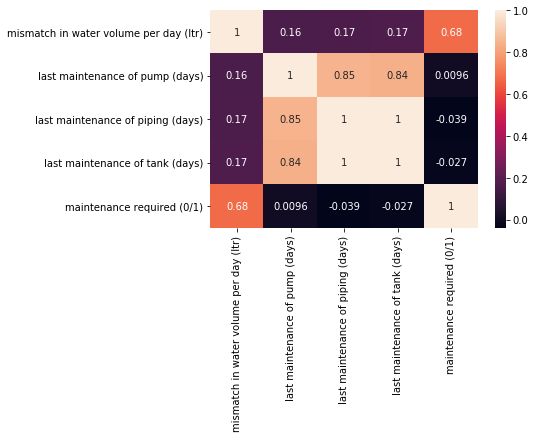

In [12]:
sns.heatmap(df.corr(), annot=True)

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
x = df.drop('maintenance required (0/1)', axis=1)
x.head()

,mismatch in water volume per day (ltr),last maintenance of pump (days),last maintenance of piping (days),last maintenance of tank (days)
0,33,68,94,95
1,60,214,317,385
2,26,189,305,306
3,90,173,143,148
4,29,98,120,126


In [23]:
y = df['maintenance required (0/1)']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: maintenance required (0/1), dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()

In [27]:
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
y_pred = lr.predict(x_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
confusion_matrix(y_test, y_pred)

array([[7, 1],
       [2, 5]], dtype=int64)

In [32]:
accuracy_score(y_test, y_pred)

0.8